No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


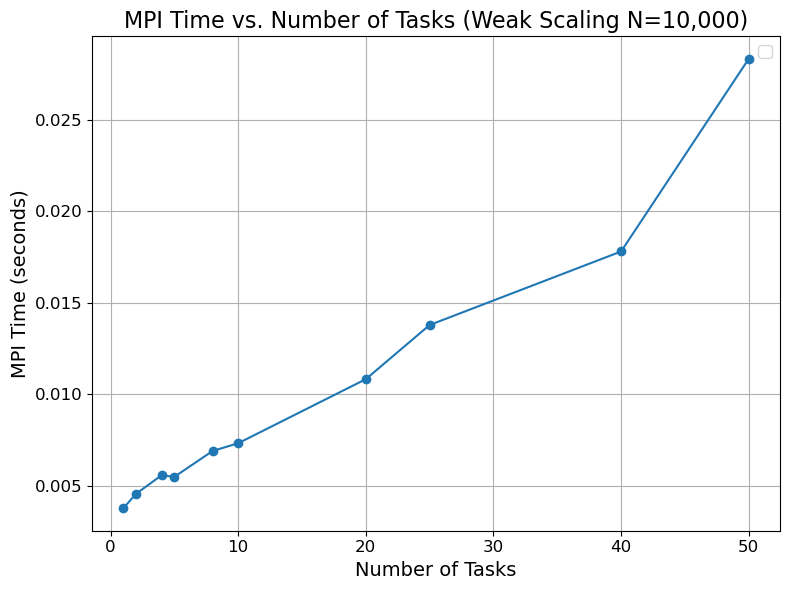

In [25]:
import matplotlib.pyplot as plt
import numpy as np

# Read data from CSV file
data = np.genfromtxt("weak.csv", delimiter=",", skip_header=1)

# Extract data into separate arrays
num_tasks = data[:, 0]
mpi_time = data[:, 1]

# Create the line graph
plt.figure(figsize=(8, 6))
plt.plot(num_tasks, mpi_time, marker='o', linestyle='-')

# Add labels and title
plt.xlabel("Number of Tasks",fontsize=14)
plt.ylabel("MPI Time (seconds)", fontsize=14)
plt.title("MPI Time vs. Number of Tasks (Weak Scaling N=10,000)", fontsize=16)

plt.legend(fontsize=12)

# Increase tick label size
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
# Show the plot
plt.grid(True)
plt.tight_layout()
plt.show()




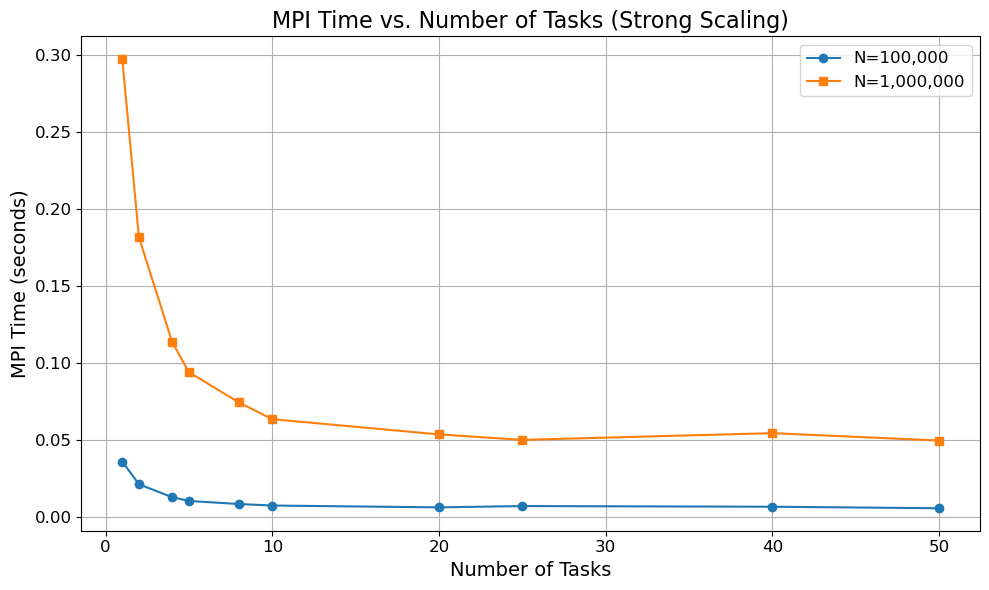

In [24]:


# Read data from CSV file
data = np.genfromtxt("strong.csv", delimiter=",", skip_header=1)

# Extract data into separate arrays
num_tasks = data[:, 0]
mpi_time_100000 = data[:, 1]
mpi_time_1000000 = data[:, 2]

# Create the line graph
plt.figure(figsize=(10, 6))

# Plot MPI time for N=100000
plt.plot(num_tasks, mpi_time_100000, marker='o', linestyle='-', label='N=100,000')

# Plot MPI time for N=1000000
plt.plot(num_tasks, mpi_time_1000000, marker='s', linestyle='-', label='N=1,000,000')

# Add labels and title
plt.xlabel("Number of Tasks",fontsize=14)
plt.ylabel("MPI Time (seconds)", fontsize=14)
plt.title("MPI Time vs. Number of Tasks (Strong Scaling)", fontsize=16)

plt.legend(fontsize=12)

# Increase tick label size
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
# Show the plot
plt.grid(True)
plt.tight_layout()
plt.show()


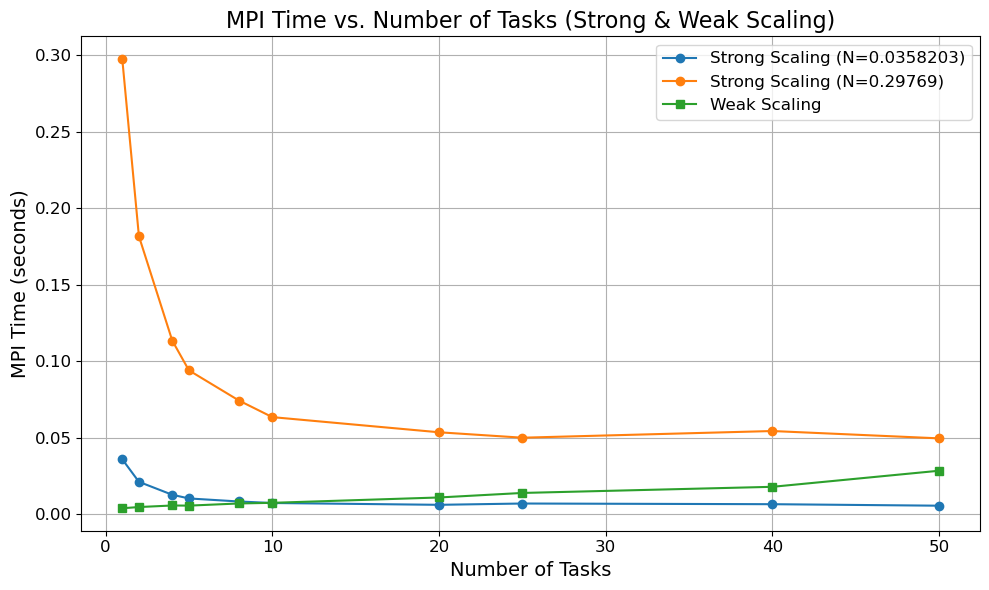

In [22]:
import matplotlib.pyplot as plt
import numpy as np

# Function to read CSV data
def read_csv_data(filename):
  data = np.genfromtxt(filename, delimiter=",", skip_header=1)
  num_tasks = data[:, 0]
  return num_tasks, data[:, 1:]  # Return tasks and remaining columns

# Read data from strong.csv
strong_tasks, strong_times = read_csv_data("strong.csv")

# Read data from weak.csv
weak_tasks, weak_times = read_csv_data("weak.csv")

# Check if both datasets have the same number of tasks (optional)
if not np.array_equal(strong_tasks, weak_tasks):
  print("Warning: Number of tasks differ between strong.csv and weak.csv")

# Create separate lines for strong and weak scaling data (assuming multiple columns in strong.csv)
num_lines = strong_times.shape[1]  # Get the number of MPI time columns (e.g., N=100000, N=1000000)
line_labels = []
for i in range(num_lines):
  line_labels.append(f"Strong Scaling (N={strong_times[0, i]})")  # Assuming first row has N values

# Create the line graph
plt.figure(figsize=(10, 6))

# Plot lines for strong scaling data
for i in range(num_lines):
  plt.plot(strong_tasks, strong_times[:, i], marker='o', linestyle='-', label=line_labels[i])

# Plot line for weak scaling data (assuming weak.csv has only one MPI time column)
plt.plot(weak_tasks, weak_times[:, 0], marker='s', linestyle='-', label='Weak Scaling')

# Add labels and title
plt.xlabel("Number of Tasks",fontsize=14)
plt.ylabel("MPI Time (seconds)", fontsize=14)
plt.title("MPI Time vs. Number of Tasks (Strong & Weak Scaling)", fontsize=16)

plt.legend(fontsize=12)

# Increase tick label size
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Show the plot
plt.grid(True)
plt.tight_layout()
plt.show()


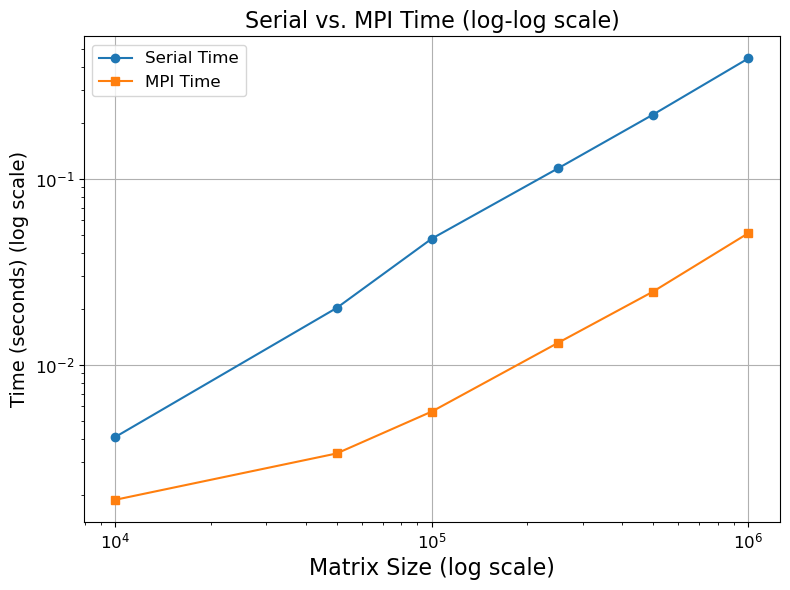

In [20]:
import matplotlib.pyplot as plt
import numpy as np

# Read data from CSV file
data = np.genfromtxt("serial_parallel.csv", delimiter=",", skip_header=1)

# Extract data into separate arrays
matrix_size = data[:, 0]
serial_time = data[:, 1]
mpi_time = data[:, 2]

# Create the log-log plot
plt.figure(figsize=(8, 6))
plt.loglog(matrix_size, serial_time, marker='o', linestyle='-', label='Serial Time')
plt.loglog(matrix_size, mpi_time, marker='s', linestyle='-', label='MPI Time')

# Add labels and title with log scale indicators
plt.xlabel("Matrix Size (log scale)", fontsize=16)
plt.ylabel("Time (seconds) (log scale)", fontsize=14)
plt.title("Serial vs. MPI Time (log-log scale)", fontsize=16)

plt.legend(fontsize=12)

# Increase tick label size
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)


# Show the plot
plt.grid(True)
plt.tight_layout()
plt.show()


[[1, 1.0, 1.0], [2, 1.700973944, 1.638720687], [4, 2.844099852, 2.625271178], [5, 3.748111375, 3.168664401], [8, 4.369453603, 4.01078921], [10, 4.96534545, 4.697441174], [20, 5.94635378, 5.568254087], [25, 5.210627147, 5.964464462], [40, 5.568479128, 5.484168698], [50, 6.574317429, 6.016285137]]


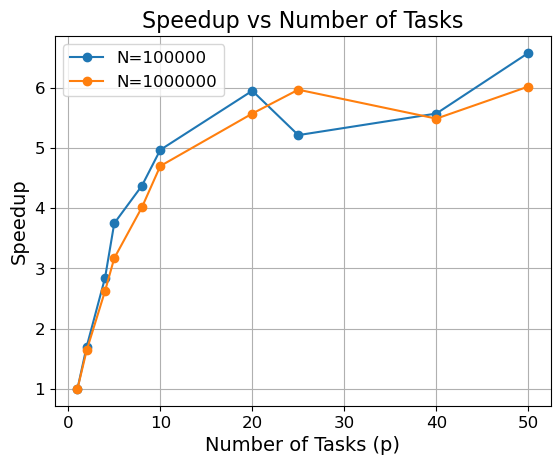

In [18]:
import csv
import matplotlib.pyplot as plt

# Define a function to read the data from the CSV file
def read_speedup_data(filename):
    data = []
    with open(filename, 'r') as file:
        reader = csv.reader(file)
        next(reader)  # Skip the header row
        for row in reader:
            data.append([int(row[0]), float(row[1]), float(row[2])])  # Adjust indices
    return data

# Read the data from the CSV file
filename = "speedup.csv"
speedup_data = read_speedup_data(filename)
print(speedup_data)

# Extracting data for plotting
tasks = [row[0] for row in speedup_data]
speedup_N100000 = [row[1] for row in speedup_data]
speedup_N1000000 = [row[2] for row in speedup_data]

# Plotting
plt.plot(tasks, speedup_N100000, marker='o', label='N=100000')
plt.plot(tasks, speedup_N1000000, marker='o', label='N=1000000')

plt.xlabel('Number of Tasks (p)', fontsize=14)
plt.ylabel('Speedup', fontsize=14)
plt.title('Speedup vs Number of Tasks', fontsize=16)
plt.legend(fontsize=12)

# Increase tick label size
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Display the plot
plt.grid(True)
plt.show()
